In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc

In [78]:
raw_data = pd.read_csv('Kobe_Shots_Preprocessed.csv')
X = raw_data.iloc[:, :-1]
y = raw_data.iloc[:, -1]

In [79]:
X['shot_type'].unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'],
      dtype=object)

In [80]:
y

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
21508    0.0
21509    0.0
21510    1.0
21511    1.0
21512    1.0
Name: shot_made_flag, Length: 21513, dtype: float64

### Encoding the data

In [81]:
X = pd.get_dummies(X, columns=['shot_type'], drop_first = True)
X

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot
0,-157,0,0,0,1,0,0
1,-101,135,0,0,1,0,0
2,138,175,0,0,1,0,0
3,0,0,1,0,0,0,0
4,-145,-11,0,0,1,0,0
...,...,...,...,...,...,...,...
21508,-23,63,0,0,1,0,0
21509,12,12,0,0,0,1,0
21510,-81,154,0,0,1,0,0
21511,5,5,1,0,0,0,0


### Splitting the dataset into training and testing

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_columns = X_train.columns.values

In [84]:
X_train_scaled = sc_X.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_columns)
X_train_scaled

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot
0,-0.625229,1.221672,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
1,-0.986705,-0.379664,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
2,0.423052,0.824177,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
3,-1.790990,0.256328,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
4,-0.092051,0.778749,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
...,...,...,...,...,...,...,...
17205,1.064672,1.710023,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
17206,-1.980765,0.483467,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
17207,1.299632,-0.958871,-0.20941,-0.070452,0.554395,-0.465586,-0.073311
17208,0.748381,0.097330,-0.20941,-0.070452,0.554395,-0.465586,-0.073311


In [85]:
X_test_scaled = sc_X.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_columns)
X_test_scaled

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot
0,0.766455,1.653238,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
1,0.414015,0.403968,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
2,1.823772,-1.413150,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
3,0.667049,0.517538,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
4,-2.098244,0.347183,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
...,...,...,...,...,...,...,...
4298,-0.064941,-1.038370,4.775311,-0.070452,-1.803769,-0.465586,-0.073311
4299,0.151945,-0.391021,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
4300,-1.293960,-0.175238,-0.209410,-0.070452,0.554395,-0.465586,-0.073311
4301,-0.064941,-1.038370,-0.209410,-0.070452,-1.803769,-0.465586,13.640572


# Logistic Regression

### Training the model

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

### Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2049  333]
 [1319  602]]


0.6160818033929817

### Finding the intercepts and coeffecients

In [88]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = X_columns)
summary_table['Coefficient'] = np.transpose(classifier.coef_)
#Adding intercept
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]
summary_table = summary_table.sort_index()
#Adding odds ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table = summary_table.sort_values('Odds_ratio', ascending=False)
summary_table

,Feature name,Coefficient,Odds_ratio
3,shot_type_Dunk,0.260598,1.297706
1,loc_x,0.003915,1.003923
4,shot_type_Hook Shot,-0.065563,0.936540
2,loc_y,-0.108619,0.897072
7,shot_type_Tip Shot,-0.140135,0.869241
0,Intercept,-0.188681,0.828051
6,shot_type_Layup,-0.354135,0.701780
5,shot_type_Jump Shot,-0.637272,0.528733


### Making results table

In [89]:
predicted_proba = classifier.predict_proba(X_test_scaled)
predicted_proba[:,1]

array([0.35586587, 0.38721401, 0.43631161, ..., 0.40063691, 0.32667858,
       0.37048025])

In [90]:
results_table = X_test.copy() 
results_table.insert(len(results_table.columns), 'shot_made', y_test)
results_table.insert(len(results_table.columns), 'prediction', y_pred)
results_table.insert(len(results_table.columns), 'probability', predicted_proba[:,1])
results_table

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot,shot_made,prediction,probability
18523,92,237,0,0,1,0,0,0.0,0.0,0.355866
19283,53,127,0,0,1,0,0,1.0,0.0,0.387214
16695,209,-33,0,0,1,0,0,0.0,0.0,0.436312
14043,81,137,0,0,1,0,0,1.0,0.0,0.384525
5796,-225,122,0,0,1,0,0,0.0,0.0,0.386344
...,...,...,...,...,...,...,...,...,...,...
20523,0,0,1,0,0,0,0,1.0,1.0,0.923970
2200,24,57,0,0,1,0,0,0.0,0.0,0.407644
20654,-136,76,0,0,1,0,0,0.0,0.0,0.400637
2214,0,0,0,0,0,0,1,0.0,0.0,0.326679


### Visualization

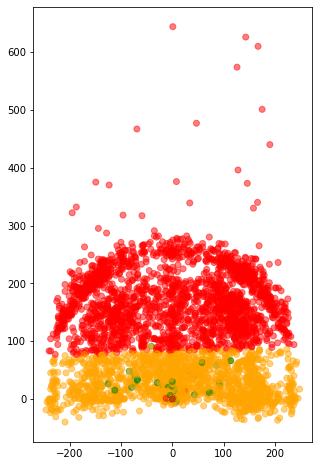

In [91]:
colors = np.where(results_table['probability']>0.6, "green", np.where(results_table['probability']>0.4, "orange", "red"))
plt.figure(figsize=(5,8))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(results_table['loc_x'], results_table['loc_y'],color=colors, alpha=0.5)
plt.show()

### CAP Curve

accuracy rate: 57.834461218115564


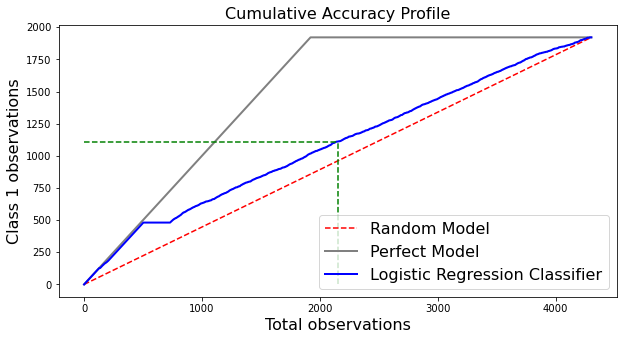

In [92]:
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count

plt.figure(figsize = (10, 5))
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = predicted_proba[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'Logistic Regression Classifier', linewidth = 2)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("accuracy rate:", str(class_1_observed))

# K nearest neighbors

### Training the model

In [93]:
from sklearn.neighbors import KNeighborsClassifier

### Finding optimal k value

In [94]:
"""
#optimal k value is around root(n) where n is number of samples.. therefore k=73
accuracy_rate = []
for i in range(50,150):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 acc_score = accuracy_score(y_test, pred_i)
 accuracy_rate.append(acc_score)

plt.figure(figsize=(10,6))
plt.plot(range(50,150),accuracy_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max accuracy:-",max(accuracy_rate),"at K =",accuracy_rate.index(max(accuracy_rate))+50)
#optimal k value = 126
"""




'\n#optimal k value is around root(n) where n is number of samples.. therefore k=73\naccuracy_rate = []\nfor i in range(50,150):\n knn = KNeighborsClassifier(n_neighbors=i)\n knn.fit(X_train_scaled,y_train)\n pred_i = knn.predict(X_test_scaled)\n acc_score = accuracy_score(y_test, pred_i)\n accuracy_rate.append(acc_score)\n\nplt.figure(figsize=(10,6))\nplt.plot(range(50,150),accuracy_rate,color=\'blue\', linestyle=\'dashed\', \n         marker=\'o\',markerfacecolor=\'red\', markersize=10)\nplt.title(\'Accuracy vs. K Value\')\nplt.xlabel(\'K\')\nplt.ylabel(\'Accuracy\')\nprint("Max accuracy:-",max(accuracy_rate),"at K =",accuracy_rate.index(max(accuracy_rate))+50)\n#optimal k value = 126\n'

In [95]:
classifier = KNeighborsClassifier(n_neighbors = 126, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=126)

### Confusion Matrix

In [96]:
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2017  365]
 [1299  622]]


0.6132930513595166

### Making the summary table

In [97]:
#'KNeighborsClassifier' object has no attribute 'coef_'

### Making results table

In [98]:
predicted_proba = classifier.predict_proba(X_test_scaled)
predicted_proba[:,1]

array([0.32539683, 0.45238095, 0.35714286, ..., 0.32539683, 0.46825397,
       0.47619048])

In [99]:
results_table = X_test.copy() 
results_table.insert(len(results_table.columns), 'shot_made', y_test)
results_table.insert(len(results_table.columns), 'prediction', y_pred)
results_table.insert(len(results_table.columns), 'probability', predicted_proba[:,1])
results_table

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot,shot_made,prediction,probability
18523,92,237,0,0,1,0,0,0.0,0.0,0.325397
19283,53,127,0,0,1,0,0,1.0,0.0,0.452381
16695,209,-33,0,0,1,0,0,0.0,0.0,0.357143
14043,81,137,0,0,1,0,0,1.0,0.0,0.484127
5796,-225,122,0,0,1,0,0,0.0,0.0,0.357143
...,...,...,...,...,...,...,...,...,...,...
20523,0,0,1,0,0,0,0,1.0,1.0,0.928571
2200,24,57,0,0,1,0,0,0.0,0.0,0.396825
20654,-136,76,0,0,1,0,0,0.0,0.0,0.325397
2214,0,0,0,0,0,0,1,0.0,0.0,0.468254


### Visualization

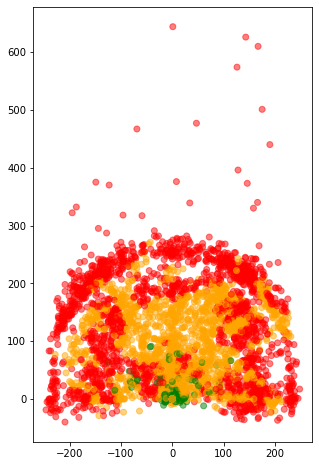

In [100]:
colors = np.where(results_table['probability']>0.6, "green", np.where(results_table['probability']>0.4, "orange", "red"))
plt.figure(figsize=(5,8))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(results_table['loc_x'], results_table['loc_y'],color=colors, alpha=0.5)
plt.show()

### CAP Curve

accuracy rate: 59.916710046850596


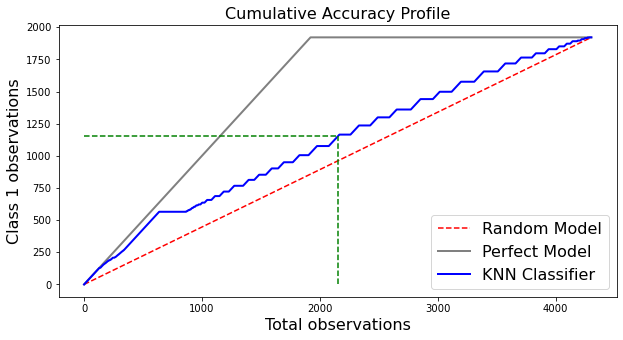

In [101]:
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count

plt.figure(figsize = (10, 5))
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = predicted_proba[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'KNN Classifier', linewidth = 2)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("accuracy rate:", str(class_1_observed))

# Support Vector Machines

### Training the model

In [102]:
from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #Very similar results.. but summary table not possible
#Proabability = True allows to compute probability but it takes too long to run
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

### Confusion Matrix

In [103]:
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2049  333]
 [1319  602]]


0.6160818033929817

### Making the summary table

In [104]:

summary_table = pd.DataFrame(columns = ['Feature name'], data = X_columns)
summary_table['Coefficient'] = np.transpose(classifier.coef_)
#Adding intercept
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]
summary_table = summary_table.sort_index()
#Adding odds ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table = summary_table.sort_values('Odds_ratio', ascending=False)
summary_table



,Feature name,Coefficient,Odds_ratio
2,loc_y,8.902977e-05,1.000089
1,loc_x,1.697649e-05,1.000017
3,shot_type_Dunk,8.640200e-12,1.000000
4,shot_type_Hook Shot,-1.399769e-12,1.000000
6,shot_type_Layup,-1.601406e-04,0.999840
7,shot_type_Tip Shot,-1.458262e-01,0.864308
0,Intercept,-5.405502e-01,0.582428
5,shot_type_Jump Shot,-8.480951e-01,0.428230


### Making results table

In [105]:
# predicted_proba = classifier.predict_proba(X_test_scaled)
# predicted_proba[:,1]

In [106]:
results_table = X_test.copy() 
results_table.insert(len(results_table.columns), 'shot_made', y_test)
results_table.insert(len(results_table.columns), 'prediction', y_pred)
#results_table.insert(len(results_table.columns), 'probability', predicted_proba[:,1])
results_table

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot,shot_made,prediction
18523,92,237,0,0,1,0,0,0.0,0.0
19283,53,127,0,0,1,0,0,1.0,0.0
16695,209,-33,0,0,1,0,0,0.0,0.0
14043,81,137,0,0,1,0,0,1.0,0.0
5796,-225,122,0,0,1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
20523,0,0,1,0,0,0,0,1.0,1.0
2200,24,57,0,0,1,0,0,0.0,0.0
20654,-136,76,0,0,1,0,0,0.0,0.0
2214,0,0,0,0,0,0,1,0.0,0.0


### Visualization

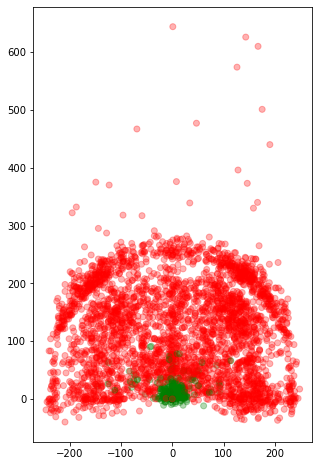

In [107]:
colors = np.where(results_table['prediction']==1, "green", "red")
plt.figure(figsize=(5,8))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(results_table['loc_x'], results_table['loc_y'],color=colors, alpha=0.3)
plt.show()

### CAP Curve

In [108]:
# Not possible because we dont have probability
"""
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count

plt.figure(figsize = (10, 5))
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = predicted_proba[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'SVM Classifier', linewidth = 2)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("accuracy rate:", str(class_1_observed))
"""

'\ntotal = len(y_test)\nclass_1_count = np.sum(y_test)\nclass_0_count = total - class_1_count\n\nplt.figure(figsize = (10, 5))\nplt.plot([0, total], [0, class_1_count], c = \'r\', linestyle = \'--\', label = \'Random Model\')\nplt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = \'grey\', linewidth = 2, label = \'Perfect Model\')\n\nprobs = predicted_proba[:, 1]\nmodel_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]\ny_values = np.append([0], np.cumsum(model_y))\nx_values = np.arange(0, total + 1)\n\nplt.plot(x_values, y_values, c = \'b\', label = \'SVM Classifier\', linewidth = 2)\n\n# Plot information\nplt.xlabel(\'Total observations\', fontsize = 16)\nplt.ylabel(\'Class 1 observations\', fontsize = 16)\nplt.title(\'Cumulative Accuracy Profile\', fontsize = 16)\nplt.legend(loc = \'lower right\', fontsize = 16)\n\n\n# Point where vertical line will cut trained model\nindex = int((50*total / 100))\n\n## 50% Verticcal line from x-axis\nplt.plot([inde

# Naive Bayes

### Training the model

In [109]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

### Confusion Matrix

In [110]:
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2054  328]
 [1330  591]]


0.6146874273762492

### Making the results table

In [111]:
predicted_proba = classifier.predict_proba(X_test_scaled)
predicted_proba[:,1]

array([5.16539682e-02, 1.07819921e-01, 9.21064102e-02, ...,
       1.05417102e-01, 7.68211812e-23, 7.29778014e-02])

In [112]:
results_table = X_test.copy() 
results_table.insert(len(results_table.columns), 'shot_made', y_test)
results_table.insert(len(results_table.columns), 'prediction', y_pred)
results_table.insert(len(results_table.columns), 'probability', predicted_proba[:,1])
results_table

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot,shot_made,prediction,probability
18523,92,237,0,0,1,0,0,0.0,0.0,5.165397e-02
19283,53,127,0,0,1,0,0,1.0,0.0,1.078199e-01
16695,209,-33,0,0,1,0,0,0.0,0.0,9.210641e-02
14043,81,137,0,0,1,0,0,1.0,0.0,9.899598e-02
5796,-225,122,0,0,1,0,0,0.0,0.0,6.038981e-02
...,...,...,...,...,...,...,...,...,...,...
20523,0,0,1,0,0,0,0,1.0,1.0,1.000000e+00
2200,24,57,0,0,1,0,0,0.0,0.0,1.377728e-01
20654,-136,76,0,0,1,0,0,0.0,0.0,1.054171e-01
2214,0,0,0,0,0,0,1,0.0,0.0,7.682118e-23


### Visualization

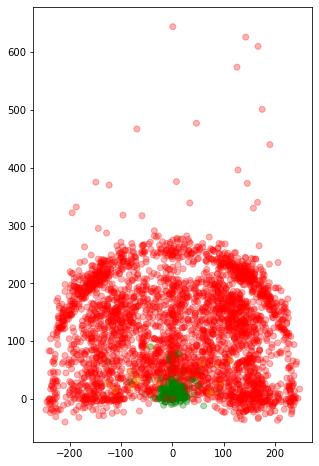

In [113]:
colors = np.where(results_table['probability']>0.6, "green", np.where(results_table['probability']>0.4, "orange", "red"))
plt.figure(figsize=(5,8))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(results_table['loc_x'], results_table['loc_y'],color=colors, alpha=0.3)
plt.show()

### CAP Curve

accuracy rate: 58.042686100989066


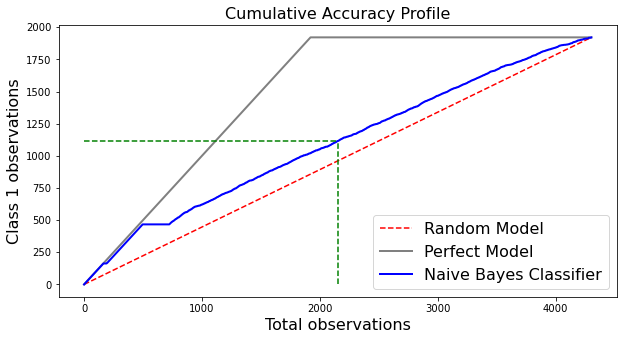

In [114]:
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count

plt.figure(figsize = (10, 5))
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = predicted_proba[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'Naive Bayes Classifier', linewidth = 2)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("accuracy rate:", str(class_1_observed))

# Decision Tree

### Finding optimal model

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
r = np.arange(250, 5000, 250)
scores = []
for i in r:
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight='balanced')
    clf.fit(X_train_scaled, y_train)
    #m=cross_validation.cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='f1')
    pred_i = clf.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, pred_i)
    scores.append((i, acc_score))
scores
#1750 works best

[(250, 0.5877294910527538),
 (500, 0.6000464792005578),
 (750, 0.6051591912619103),
 (1000, 0.5991168951894027),
 (1250, 0.5995816871949803),
 (1500, 0.5902858470834301),
 (1750, 0.6135254473623054),
 (2000, 0.6135254473623054),
 (2250, 0.6135254473623054),
 (2500, 0.5921450151057401),
 (2750, 0.6135254473623054),
 (3000, 0.6135254473623054),
 (3250, 0.6135254473623054),
 (3500, 0.6135254473623054),
 (3750, 0.6135254473623054),
 (4000, 0.6135254473623054),
 (4250, 0.5923774111085289),
 (4500, 0.5923774111085289),
 (4750, 0.5923774111085289)]

### Training the model

In [148]:
#classifier = DecisionTreeClassifier(min_samples_leaf=1750, random_state = 0, class_weight='balanced')
classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1750, random_state = 0)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1750,
                       random_state=0)

### Confusion Matrix

In [149]:
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2029  353]
 [1310  611]]


0.6135254473623054

### Results Table

In [150]:
predicted_proba = classifier.predict_proba(X_test_scaled)
predicted_proba[:,1]

array([0.31861888, 0.44546532, 0.37582418, ..., 0.37272375, 0.62876915,
       0.44546532])

In [151]:
results_table = X_test.copy() 
results_table.insert(len(results_table.columns), 'shot_made', y_test)
results_table.insert(len(results_table.columns), 'prediction', y_pred)
results_table.insert(len(results_table.columns), 'probability', predicted_proba[:,1])
results_table

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot,shot_made,prediction,probability
18523,92,237,0,0,1,0,0,0.0,0.0,0.318619
19283,53,127,0,0,1,0,0,1.0,0.0,0.445465
16695,209,-33,0,0,1,0,0,0.0,0.0,0.375824
14043,81,137,0,0,1,0,0,1.0,0.0,0.445465
5796,-225,122,0,0,1,0,0,0.0,0.0,0.372724
...,...,...,...,...,...,...,...,...,...,...
20523,0,0,1,0,0,0,0,1.0,1.0,0.628769
2200,24,57,0,0,1,0,0,0.0,0.0,0.415335
20654,-136,76,0,0,1,0,0,0.0,0.0,0.372724
2214,0,0,0,0,0,0,1,0.0,1.0,0.628769


### Visualization

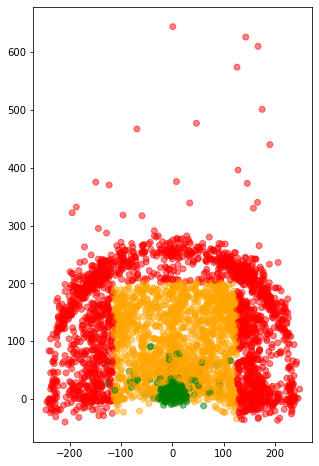

In [152]:
colors = np.where(results_table['probability']>0.6, "green", np.where(results_table['probability']>0.4, "orange", "red"))
plt.figure(figsize=(5,8))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(results_table['loc_x'], results_table['loc_y'],color=colors, alpha=0.5)
plt.show()

### CAP Curve

accuracy rate: 63.977095262883914


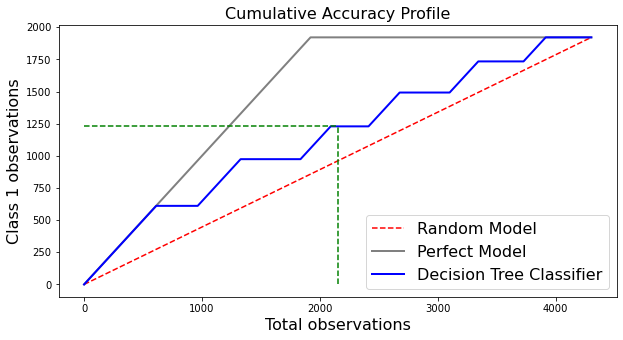

In [153]:
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count

plt.figure(figsize = (10, 5))
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = predicted_proba[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'Decision Tree Classifier', linewidth = 2)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("accuracy rate:", str(class_1_observed))

# Random Forest

### Optimal Model

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
"""
r = np.arange(1, 100, 1)
scores = []
for i in r:
    clf = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
    clf.fit(X_train_scaled, y_train)
    #m=cross_validation.cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='f1')
    pred_i = clf.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, pred_i)
    scores.append((i, acc_score))
print(scores)
scores.index(max(scores))
"""
#Not a good stratergy to calculate optimal

"\nr = np.arange(1, 100, 1)\nscores = []\nfor i in r:\n    clf = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)\n    clf.fit(X_train_scaled, y_train)\n    #m=cross_validation.cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='f1')\n    pred_i = clf.predict(X_test_scaled)\n    acc_score = accuracy_score(y_test, pred_i)\n    scores.append((i, acc_score))\nprint(scores)\nscores.index(max(scores))\n"

### Training the model

In [174]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 97, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=97, random_state=0)

### Confustion Matrix

In [175]:
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1454  928]
 [ 917 1004]]


0.5712293748547524

### Results Table

In [176]:
predicted_proba = classifier.predict_proba(X_test_scaled)
predicted_proba[:,1]

array([0.05154639, 0.78350515, 0.16494845, ..., 0.67525773, 0.29752525,
       0.32646048])

In [177]:
results_table = X_test.copy() 
results_table.insert(len(results_table.columns), 'shot_made', y_test)
results_table.insert(len(results_table.columns), 'prediction', y_pred)
results_table.insert(len(results_table.columns), 'probability', predicted_proba[:,1])
results_table

,loc_x,loc_y,shot_type_Dunk,shot_type_Hook Shot,shot_type_Jump Shot,shot_type_Layup,shot_type_Tip Shot,shot_made,prediction,probability
18523,92,237,0,0,1,0,0,0.0,0.0,0.051546
19283,53,127,0,0,1,0,0,1.0,1.0,0.783505
16695,209,-33,0,0,1,0,0,0.0,0.0,0.164948
14043,81,137,0,0,1,0,0,1.0,0.0,0.343643
5796,-225,122,0,0,1,0,0,0.0,0.0,0.092784
...,...,...,...,...,...,...,...,...,...,...
20523,0,0,1,0,0,0,0,1.0,1.0,0.923843
2200,24,57,0,0,1,0,0,0.0,0.0,0.041237
20654,-136,76,0,0,1,0,0,0.0,1.0,0.675258
2214,0,0,0,0,0,0,1,0.0,0.0,0.297525


### Visualization

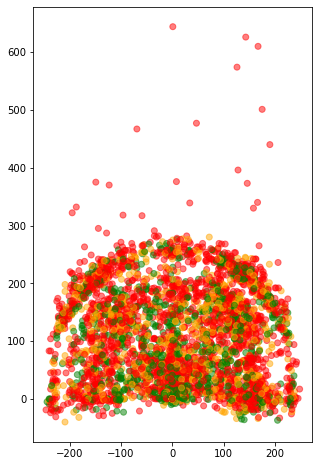

In [178]:
colors = np.where(results_table['probability']>0.6, "green", np.where(results_table['probability']>0.4, "orange", "red"))
plt.figure(figsize=(5,8))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(results_table['loc_x'], results_table['loc_y'],color=colors, alpha=0.5)
plt.show()

### CAP Curve

accuracy rate: 56.94950546590317


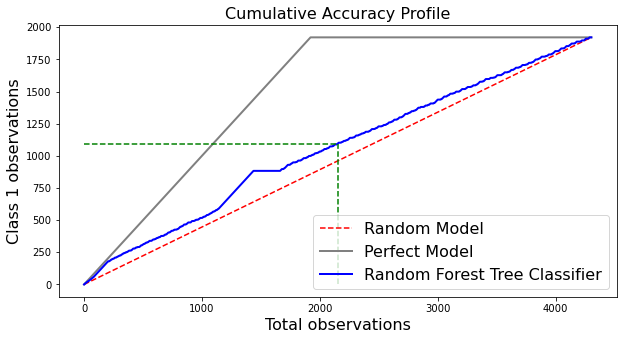

In [179]:
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count

plt.figure(figsize = (10, 5))
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = predicted_proba[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'Random Forest Tree Classifier', linewidth = 2)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("accuracy rate:", str(class_1_observed))